## MediaPipe Model Maker

In [50]:
import cv2
import matplotlib.pyplot as plt
from tflite_support.task import vision

In [51]:
detector = vision.ObjectDetector.create_from_file('lite-model_efficientdet_lite2_detection_metadata_1.tflite')

In [58]:
tensor_image = vision.TensorImage.create_from_file('dogs.jpg')
results = detector.detect(tensor_image)

In [59]:
results

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=474, origin_y=148, width=736, height=602), categories=[Category(index=17, score=0.48046875, display_name='', category_name='dog')]), Detection(bounding_box=BoundingBox(origin_x=491, origin_y=151, width=241, height=266), categories=[Category(index=15, score=0.21484375, display_name='', category_name='bird')]), Detection(bounding_box=BoundingBox(origin_x=857, origin_y=225, width=329, height=350), categories=[Category(index=17, score=0.125, display_name='', category_name='dog')]), Detection(bounding_box=BoundingBox(origin_x=484, origin_y=318, width=92, height=91), categories=[Category(index=56, score=0.0703125, display_name='', category_name='carrot')]), Detection(bounding_box=BoundingBox(origin_x=454, origin_y=158, width=631, height=362), categories=[Category(index=15, score=0.05078125, display_name='', category_name='bird')]), Detection(bounding_box=BoundingBox(origin_x=486, origin_y=165, width=341, height=446), cat

In [60]:
def visualize(img, results, conf_thresh = 0.25):
  canvas = img.copy()
  for detection in results.detections:
    x1 = detection.bounding_box.origin_x 
    y1 = detection.bounding_box.origin_y 
    width = detection.bounding_box.width 
    height = detection.bounding_box.height
    x2 = x1 + width
    y2 = y1 + height
    score = detection.categories[0].score 
    category = detection.categories[0].category_name

    if score > conf_thresh:
      cv2.rectangle(canvas, (x1, y1), (x2, y2), (0,0,255), 2)

    # print(f"Object : {category} Box dimensions: ({x1},{y1}),({x2},{y2})")
  return canvas

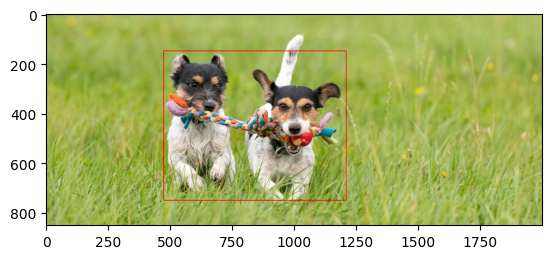

In [61]:
img1 = cv2.imread('dogs.jpg')
res1 = visualize(img1, results)
plt.imshow(res1[...,::-1]);

In [64]:
tensor_image = vision.TensorImage.create_from_file('dog.jpg')
results = detector.detect(tensor_image)

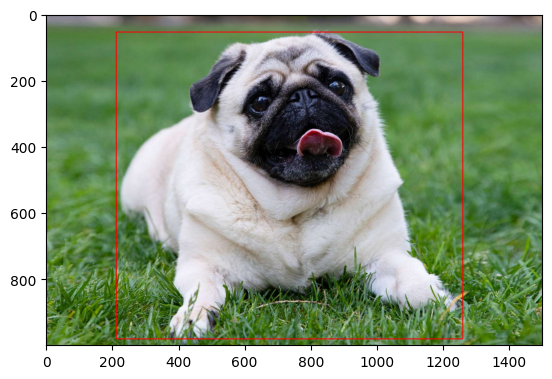

In [65]:
img2 = cv2.imread('dog.jpg')
res2 = visualize(img2, results)
plt.imshow(res2[...,::-1]);